In [2]:
import seaborn as sns
#붓꽃 데이터셋 로딩
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#품종 확인
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
X=iris.iloc[:, :4].values # 독립변수
y=iris.iloc[:,4].values #종속변수
print(y[:5])
encoder=LabelEncoder() #문자열에 label을 붙임
y1=encoder.fit_transform(y)
print(y1[:5])
y2=pd.get_dummies(y1).values #종속변수에 대한 원핫인코딩 처리
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [5]:
from sklearn.model_selection import train_test_split
#학습용, 검증용 데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y,random_state=10)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
#모델 생성
model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.2516 - accuracy: 0.3417
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9281 - accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7557 - accuracy: 0.6917
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6883 - accuracy: 0.9250
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6335 - accuracy: 0.9167
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5741 - accuracy: 0.8833
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 0.5280 - accuracy: 0.8833
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4903 - accuracy: 0.9333
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4565 - accuracy: 0.9583
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4286 - accuracy: 0.9417
Epoch 11/100
4/4 [==========

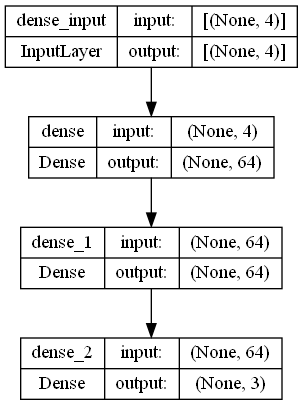

In [8]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

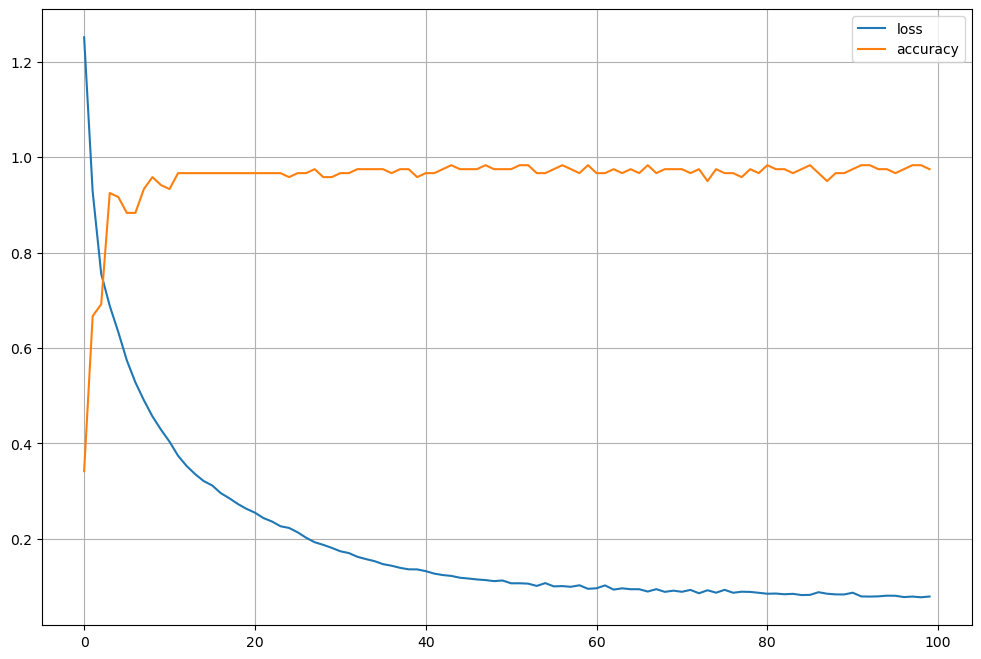

In [9]:
import matplotlib.pyplot as plt
#그래프 출력
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [10]:
#모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("정확도 = {:.2f}".format(accuracy))

정확도 = 1.00


In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(pred[:10])
y_test_class = np.argmax(y_test,axis=1)
pred_class = np.argmax(pred,axis=1)
print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class,pred_class))

1/1 [==============================] - 0s 90ms/step
[[1.3608473e-03 9.0641040e-01 9.2228755e-02]
 [9.9704701e-01 2.9530525e-03 1.3235708e-08]
 [1.2700777e-03 6.9572854e-01 3.0300128e-01]
 [1.2808167e-04 2.7860060e-01 7.2127134e-01]
 [1.4633949e-02 9.8281705e-01 2.5489207e-03]
 [7.3862302e-06 3.0743634e-02 9.6924901e-01]
 [9.9514824e-01 4.8517599e-03 4.5490623e-08]
 [2.2722579e-06 6.6085029e-03 9.9338925e-01]
 [2.0142218e-06 7.6526920e-03 9.9234527e-01]
 [9.9983156e-01 1.6836450e-04 4.1997770e-11]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 1 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [12]:
model.save('c:/data/iris')

INFO:tensorflow:Assets written to: c:/data/iris\assets


In [13]:
model.save('c:/data/iris/iris.h5')